In [1]:
import pyslha
import numpy as np
import ROOT

Welcome to JupyROOT 6.30/04


In [36]:
yukawa_type = 4
tanb = 50

In [37]:
# change mA and see how Hc -> WA branching ratio changes
mHc_values = np.arange(70, 165, 5)
graph_Wb = ROOT.TGraph()
graph_Hcb = ROOT.TGraph()
graph_others = ROOT.TGraph()

for mHc in mHc_values:
    d = pyslha.read(f"outputs/type{yukawa_type}/output.tanb{tanb}.{mHc}.50.lha")
    top = d.decays[6]
    br_others = 0.
    for decay in top.decays:
        if decay.ids == [24, 5]: graph_Wb.AddPoint(mHc, decay.br)
        elif decay.ids == [37, 5]: graph_Hcb.AddPoint(mHc, decay.br)
        else: br_others += decay.br
    graph_others.AddPoint(mHc, br_others)       


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


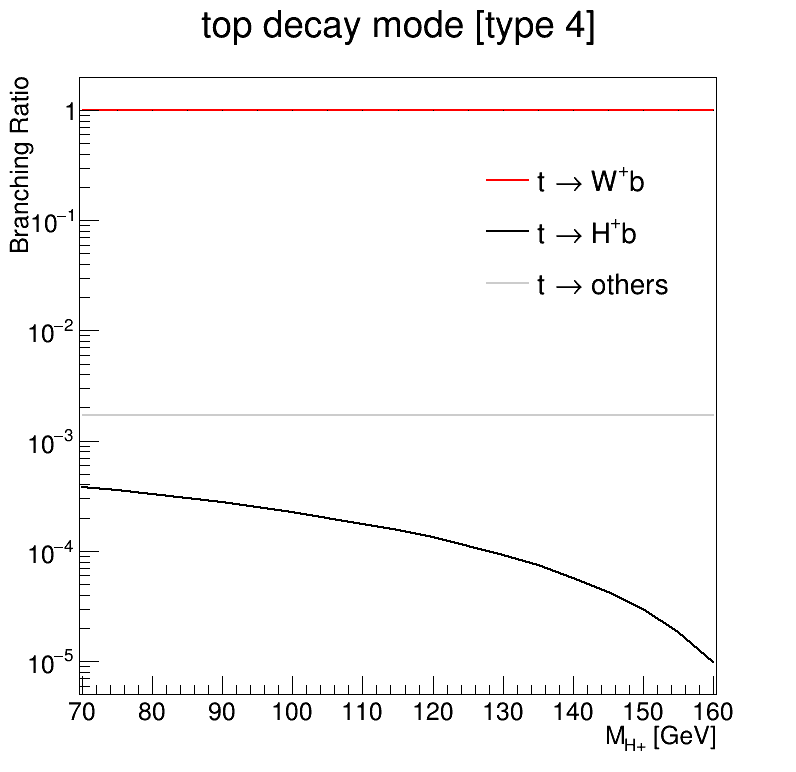

In [40]:
graph_Wb.SetTitle(f"top decay mode [type {yukawa_type}]")
graph_Wb.GetXaxis().SetRangeUser(70, 160.)
graph_Wb.GetXaxis().SetTitle("M_{H+} [GeV]")

graph_Wb.GetYaxis().SetRangeUser(5e-6, 2.)
graph_Wb.GetYaxis().SetTitle("Branching Ratio")
graph_Wb.GetYaxis().SetTitleOffset(1.3)

graph_Wb.SetLineColor(ROOT.kRed); graph_Wb.SetLineWidth(2)
graph_Hcb.SetLineColor(ROOT.kBlack); graph_Hcb.SetLineWidth(2)
graph_others.SetLineColor(ROOT.kGray); graph_others.SetLineWidth(2)

lg = ROOT.TLegend(0.6, 0.6, 0.9, 0.8)
lg.SetFillStyle(0)
lg.SetBorderSize(0)
lg.AddEntry(graph_Wb, "t #rightarrow W^{+}b", "l")
lg.AddEntry(graph_Hcb, "t #rightarrow H^{+}b", "l")
lg.AddEntry(graph_others, "t #rightarrow others", "l")

c = ROOT.TCanvas("c", "", 800, 800)
c.cd()
c.SetLogy()
graph_Wb.Draw()
graph_Hcb.Draw("same")
graph_others.Draw("same")
lg.Draw("same")
c.RedrawAxis()
c.Draw()